In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn opencv-python

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data loading and exploration

In [4]:
df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

In [5]:
print(df.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


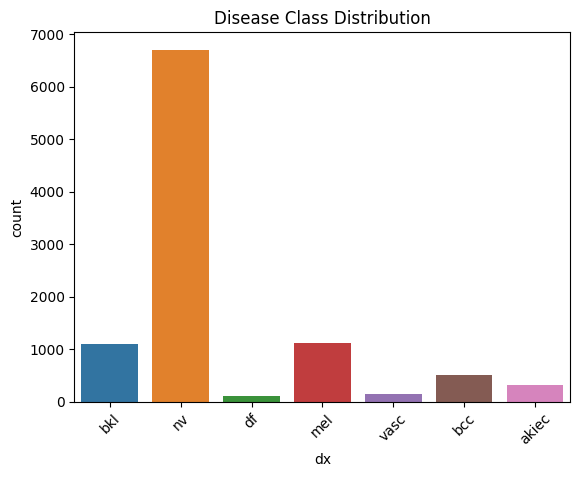

In [6]:
print(df["dx"].value_counts())
sns.countplot(x="dx", data=df)
plt.title("Disease Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [7]:
import shutil 
import os 

src1 ="/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1"
src2 = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2"

dst = "/kaggle/working/all_images"

os.makedirs(dst, exist_ok=True)

for src in [src1 , src2] :
    for file in os.listdir(src):
        print(file)
        shutil.copy(os.path.join(src , file) , dst)

ISIC_0028933.jpg
ISIC_0028394.jpg
ISIC_0027799.jpg
ISIC_0028100.jpg
ISIC_0027960.jpg
ISIC_0028872.jpg
ISIC_0026412.jpg
ISIC_0024872.jpg
ISIC_0026232.jpg
ISIC_0027031.jpg
ISIC_0026692.jpg
ISIC_0025729.jpg
ISIC_0028582.jpg
ISIC_0024754.jpg
ISIC_0027742.jpg
ISIC_0025408.jpg
ISIC_0026474.jpg
ISIC_0027164.jpg
ISIC_0027228.jpg
ISIC_0028059.jpg
ISIC_0028588.jpg
ISIC_0029299.jpg
ISIC_0027221.jpg
ISIC_0024912.jpg
ISIC_0028259.jpg
ISIC_0025844.jpg
ISIC_0028090.jpg
ISIC_0025454.jpg
ISIC_0028842.jpg
ISIC_0026980.jpg
ISIC_0026662.jpg
ISIC_0025037.jpg
ISIC_0025876.jpg
ISIC_0024901.jpg
ISIC_0025611.jpg
ISIC_0027201.jpg
ISIC_0025536.jpg
ISIC_0027941.jpg
ISIC_0026620.jpg
ISIC_0026352.jpg
ISIC_0026239.jpg
ISIC_0025595.jpg
ISIC_0026534.jpg
ISIC_0027384.jpg
ISIC_0026476.jpg
ISIC_0025575.jpg
ISIC_0024862.jpg
ISIC_0025553.jpg
ISIC_0027136.jpg
ISIC_0025702.jpg
ISIC_0026957.jpg
ISIC_0024467.jpg
ISIC_0024725.jpg
ISIC_0026203.jpg
ISIC_0028507.jpg
ISIC_0028942.jpg
ISIC_0026682.jpg
ISIC_0028456.jpg
ISIC_0025159.j

In [8]:
df['image_path']="/kaggle/working/all_images/"+df['image_id']+".jpg"

In [9]:
label_map = {
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'vasc': 'Vascular lesions'
}

df["label"] = df["dx"].map(label_map)

In [10]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/kaggle/working/all_images/ISIC_0027419.jpg,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/kaggle/working/all_images/ISIC_0025030.jpg,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/kaggle/working/all_images/ISIC_0026769.jpg,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/kaggle/working/all_images/ISIC_0025661.jpg,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/kaggle/working/all_images/ISIC_0031633.jpg,Benign keratosis-like lesions


## data splitting

In [11]:
from sklearn.model_selection import train_test_split
train_df , test_df= train_test_split(df , stratify =df["label"] ,test_size=0.2, random_state=42)
test_df , val_df = train_test_split(test_df , stratify =test_df["label"] ,test_size=0.5, random_state=42)

In [12]:
print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 8012, Val: 1002, Test: 1001


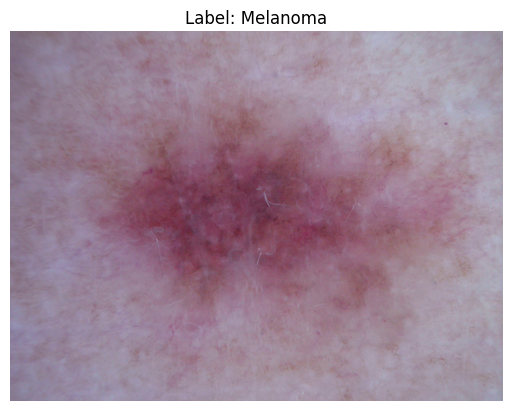

In [13]:
import cv2
import matplotlib.pyplot as plt

sample = df.sample(1).iloc[0]
image = cv2.imread(sample["image_path"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title(f"Label: {sample['label']}")
plt.axis("off")
plt.show()


In [14]:
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Get class labels
labels = train_df["label"].values
classes = np.unique(labels)



In [15]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [16]:
device

device(type='cuda')

## fix class imbalance : class weight

In [17]:
import torch.nn as nn

# Compute weights
weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)
class_weights_tensor = torch.tensor(weights, dtype=torch.float).to(device)

# Define loss function
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)


In [18]:
class_weights_tensor 

tensor([ 4.3686,  2.7848,  1.3021, 12.4410,  0.2134,  1.2860, 10.0401],
       device='cuda:0')

In [19]:
classes

array(['Actinic keratoses', 'Basal cell carcinoma',
       'Benign keratosis-like lesions', 'Dermatofibroma',
       'Melanocytic nevi', 'Melanoma', 'Vascular lesions'], dtype=object)

## fix class imbalance : data augmentation 

In [20]:
!pip install -U albumentations[imgaug] --quiet


In [21]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Training transforms
train_transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.ColorJitter(p=0.2),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2(),
])

# Validation/test transforms
val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2(),
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [22]:
from torch.utils.data import Dataset
from PIL import Image
import cv2

class SkinDataset(Dataset):
    def __init__(self, dataframe, transform=None, label_map=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
        self.label_map = label_map  # e.g., {'melanoma': 0, 'nv': 1, ...}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = cv2.imread(row["image_path"])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform:
            image = self.transform(image=image)["image"]

        label = self.label_map[row["label"]]
        return image, label


In [23]:
# Create a label map: string → index
unique_labels = train_df["label"].unique()
label_map = {label: idx for idx, label in enumerate(sorted(unique_labels))}

# Inverse map for predictions
inv_label_map = {v: k for k, v in label_map.items()}

# Create dataset objects
train_dataset = SkinDataset(train_df, transform=train_transform, label_map=label_map)
val_dataset = SkinDataset(val_df, transform=val_transform, label_map=label_map)

# Create loaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)


# modeling

In [24]:
!pip install lightning

In [25]:
from torchvision import models
import torch.nn as nn



def create_model(num_classes):
    model = models.convnext_tiny(weights="ConvNeXt_Tiny_Weights.DEFAULT")
    model.classifier[2] = nn.Linear(model.classifier[2].in_features, num_classes)
    return model



In [34]:
import torch
import torch.nn.functional as F
import torchmetrics
from lightning import LightningModule

class SkinClassifier(LightningModule):
    def __init__(self, model, loss_fn, num_classes, freeze_until_layer=-3, base_lr=1e-5, head_lr=1e-4):
        super().__init__()
        self.save_hyperparameters()

        self.model = model
        self.loss_fn = loss_fn

        # Freeze all layers
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze last N layers of the feature extractor
        for name, module in list(self.model.features.named_children())[freeze_until_layer:]:
            for param in module.parameters():
                param.requires_grad = True

        # Always unfreeze classifier
        for param in self.model.classifier.parameters():
            param.requires_grad = True

        # Define metrics
        self.train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
        self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)
        self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=num_classes)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        acc = self.train_acc(logits, y)
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        acc = self.val_acc(logits, y)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss_fn(logits, y)
        acc = self.test_acc(logits, y)
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam([
            {"params": self.model.features.parameters(), "lr": self.hparams.base_lr},
            {"params": self.model.classifier.parameters(), "lr": self.hparams.head_lr}
        ])
        scheduler = {
            "scheduler": torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, mode="min", patience=3, factor=0.5),
            "monitor": "val_loss",
            "interval": "epoch",
            "frequency": 1,
        }
        return {"optimizer": optimizer, "lr_scheduler": scheduler}


In [35]:
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="min"
)

checkpoint = ModelCheckpoint(
    monitor="val_acc",
    save_top_k=1,
    mode="max",
    filename="best-skin-model-{epoch:02d}-{val_acc:.2f}"
)


In [36]:
from lightning import Trainer

# Create model and LightningModule
model = create_model(num_classes=len(label_map))
lit_model = SkinClassifier(
    model=model,
    loss_fn=loss_fn,
    num_classes=len(label_map),
    freeze_until_layer=-2,
    base_lr=1e-5,
    head_lr=1e-4
)

# Trainer with callbacks
trainer = Trainer(
    max_epochs=30,
    accelerator="auto",
    precision="16-mixed",
    callbacks=[early_stop, checkpoint],
    log_every_n_steps=10,
    default_root_dir="checkpoints/"
)

# Train
trainer.fit(lit_model, train_loader, val_loader)


INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
INFO: 
  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | ConvNeXt           | 27.8 M | train
1 | loss_fn   | CrossEntropyLoss   | 0      | train
2 | train_acc | MulticlassAccuracy | 0      | train
3 | val_acc   | MulticlassAccuracy | 0      | train
4 | test_acc  | MulticlassAccuracy | 0      | train
---------------------------------------------------------
15.5 M    Trainable params
12.3 M    Non-trai

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=30` reached.


In [39]:

test_dataset = SkinDataset(test_df, transform=val_transform, label_map=label_map)

# Create loaders
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=2)

In [40]:
trainer.test(lit_model, dataloaders=test_loader)


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7982017993927002     │
│         test_loss         │    0.5189666748046875     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5189666748046875, 'test_acc': 0.7982017993927002}]

In [41]:
torch.save(lit_model.model.state_dict(), "skin_classifier.pth")
